In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from xgboost import XGBClassifier

In [87]:
df_train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") #real world dataset from kaggel

In [88]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [90]:
df_train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [91]:
df_train["Dependents"]=df_train["Dependents"].replace("3+",3).astype(float)

df_train["Gender"] = df_train["Gender"].fillna(df_train["Gender"].mode()[0])
df_train["Married"] = df_train["Married"].fillna(df_train["Married"].mode()[0])
df_train["Dependents"] = df_train["Dependents"].fillna(df_train["Dependents"].mode()[0])
df_train["Self_Employed"] = df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0])
df_train["LoanAmount"] = df_train["LoanAmount"].fillna(df_train["LoanAmount"].median())
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mode()[0])
df_train["Credit_History"] = df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0])

In [92]:
# Divide all data in Loan_Amount_Term by 10
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"] / 10

In [93]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,36.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,36.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,36.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,36.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,36.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,36.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,18.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,36.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,36.0,1.0,Urban,Y


In [94]:
df_train=df_train.drop(columns=["Loan_ID"])

In [95]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,36.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,36.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,36.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,36.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,36.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,36.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,18.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,36.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,36.0,1.0,Urban,Y


In [96]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
categorical_data = [i for i in df_train.columns if df_train[i].dtype=="object"]
categorical_data

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [98]:
cols_to_encode = ["Gender","Married", "Education", "Self_Employed", "Property_Area","Loan_Status"]
le = LabelEncoder()

for col in cols_to_encode:
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    
    print(f"\nMapping for {col}:")
    for i, cls in enumerate(le.classes_):
        print(f"  {cls} → {i}")


Mapping for Gender:
  Female → 0
  Male → 1

Mapping for Married:
  No → 0
  Yes → 1

Mapping for Education:
  Graduate → 0
  Not Graduate → 1

Mapping for Self_Employed:
  No → 0
  Yes → 1

Mapping for Property_Area:
  Rural → 0
  Semiurban → 1
  Urban → 2

Mapping for Loan_Status:
  N → 0
  Y → 1


In [99]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,128.0,36.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,36.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,36.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,36.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,36.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,36.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,18.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,36.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,36.0,1.0,2,1


In [100]:
df_train["TotalIncome"] = df_train["ApplicantIncome"] + df_train["CoapplicantIncome"]

idx = df_train.columns.get_loc("ApplicantIncome")

df_train.drop(["ApplicantIncome", "CoapplicantIncome"], axis=1, inplace=True)

cols = list(df_train.columns)

cols.remove("TotalIncome")

cols.insert(idx, "TotalIncome")

df_train = df_train[cols]

In [101]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849.0,128.0,36.0,1.0,2,1
1,1,1,1.0,0,0,6091.0,128.0,36.0,1.0,0,0
2,1,1,0.0,0,1,3000.0,66.0,36.0,1.0,2,1
3,1,1,0.0,1,0,4941.0,120.0,36.0,1.0,2,1
4,1,0,0.0,0,0,6000.0,141.0,36.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900.0,71.0,36.0,1.0,0,1
610,1,1,3.0,0,0,4106.0,40.0,18.0,1.0,0,1
611,1,1,1.0,0,0,8312.0,253.0,36.0,1.0,2,1
612,1,1,2.0,0,0,7583.0,187.0,36.0,1.0,2,1


In [102]:
X= df_train.drop("Loan_Status", axis=1)
y= df_train["Loan_Status"]

In [103]:
X

,Gender,Married,Dependents,Education,Self_Employed,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849.0,128.0,36.0,1.0,2
1,1,1,1.0,0,0,6091.0,128.0,36.0,1.0,0
2,1,1,0.0,0,1,3000.0,66.0,36.0,1.0,2
3,1,1,0.0,1,0,4941.0,120.0,36.0,1.0,2
4,1,0,0.0,0,0,6000.0,141.0,36.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900.0,71.0,36.0,1.0,0
610,1,1,3.0,0,0,4106.0,40.0,18.0,1.0,0
611,1,1,1.0,0,0,8312.0,253.0,36.0,1.0,2
612,1,1,2.0,0,0,7583.0,187.0,36.0,1.0,2


In [104]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0.0,0,0,8250.0,265.0,36.0,1.0,1
90,1,1,0.0,0,0,5858.0,131.0,36.0,1.0,1
227,1,1,2.0,0,0,7945.0,210.0,36.0,1.0,1
482,1,1,0.0,0,0,5233.0,128.0,36.0,1.0,1
464,1,0,0.0,0,0,4166.0,98.0,36.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
71,1,1,2.0,1,1,3750.0,97.0,36.0,1.0,1
106,1,1,2.0,0,0,12543.0,225.0,36.0,1.0,2
270,0,0,0.0,0,0,3237.0,30.0,36.0,1.0,2
435,0,1,0.0,0,0,10047.0,128.0,24.0,1.0,1


In [107]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0.0,0,0,9083.0,228.0,36.0,1.0,1
377,1,1,0.0,0,0,4310.0,130.0,36.0,1.0,1
163,1,1,2.0,0,0,5614.0,158.0,36.0,1.0,0
609,0,0,0.0,0,0,2900.0,71.0,36.0,1.0,0
132,1,0,0.0,0,0,2718.0,70.0,36.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
231,1,1,0.0,0,0,3716.0,42.0,18.0,1.0,0
312,0,0,0.0,0,0,2507.0,56.0,36.0,1.0,0
248,1,1,1.0,0,0,4725.0,123.0,48.0,1.0,1
11,1,1,2.0,0,0,4340.0,109.0,36.0,1.0,2


In [108]:
y_train

83     0
90     1
227    1
482    1
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int32

In [109]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int32

In [110]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver="lbfgs"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.7805
Random Forest: 0.7642
Gradient Boosting: 0.7642
XGBoost: 0.7561


In [111]:
#Using Logistic Regression
name="Logistic Regression"
model=LogisticRegression(max_iter=5000, solver="lbfgs")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"{name}: {acc:.4f}")

Logistic Regression: 0.7805


In [112]:
def check_fit_status(model, X_train, y_train, X_test, y_test):
    # Training performance
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Testing performance
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy : {test_acc:.4f}")

    if train_acc > 0.90 and (train_acc - test_acc) > 0.1:
        print("Model is Overfitting")
    elif train_acc < 0.70 and test_acc < 0.70:
        print("Model is Underfitting")
    else:
        print("Model seems Generalized")
check_fit_status(model, X_train, y_train, X_test, y_test)

Train Accuracy: 0.8147
Test Accuracy : 0.7805
Model seems Generalized


In [113]:
# Ridge (L2 regularization)
log_reg_ridge = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=5000)

# Lasso (L1 regularization)
log_reg_lasso = LogisticRegression(penalty="l1", C=1.0, solver="saga", max_iter=5000)

# Elastic Net (mix of L1 and L2)
log_reg_enet = LogisticRegression(penalty="elasticnet", l1_ratio=0.5, solver="saga", max_iter=5000)

In [114]:
log_reg_ridge.fit(X_train, y_train)
log_reg_lasso.fit(X_train, y_train)
log_reg_enet.fit(X_train, y_train)

C:\Users\amogh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\amogh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, max_iter=5000, penalty='elasticnet',
                   solver='saga')

In [115]:
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Ridge (L2)": log_reg_ridge,#default one
    "Lasso (L1)": log_reg_lasso,
    "Elastic Net": log_reg_enet
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

Ridge (L2) Accuracy: 0.7805
Lasso (L1) Accuracy: 0.6504
Elastic Net Accuracy: 0.6504


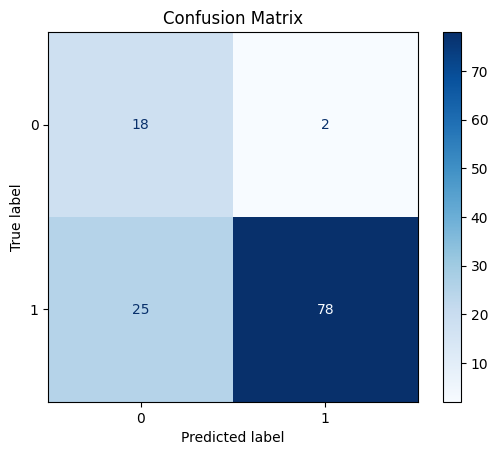

In [119]:
# ---- Confusion Matrix ----
y_pred = log_reg_ridge.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_ridge.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [118]:
import joblib

# Assuming your trained Logistic Regression model is in variable `log_reg_model`
joblib.dump(log_reg_ridge, "loan_model.pkl")

['loan_model.pkl']